In [1]:
import pandas as pd
import numpy as np

import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

In this script, we explore what are the cause of low agreement between two clustering approach - attractor-based clustering approach and the simulation-based clustering approach. 

# Cortical Area Development_20862356

## Load the model

In [2]:
model_name = 'Cortical Area Development_20862356'

## Load the calculated attractor

We load the calculated attractor data and attractor group as defined earlier in the script 
`Kadelka_model_calculate_attractors.py`

In [3]:
attractor_path = '/home/spankaew/Git/astrologics/data/attractor_group/calculated_attractor/' + model_name + '_attractors.csv'
attractor_data = pd.read_csv(attractor_path, index_col = 0)

In [4]:
model_path = '/home/spankaew/Git/astrologics/inferred_model/' + model_name  + '/'
model = le.LogicEnsemble(model_path, project_name = 'test')
model.create_simulation()

Simulation object created


In [5]:
simulation_path = '/home/spankaew/Git/astrologics/data/simulation_files/' + model_name + '_simulation.csv'
model.simulation.simulation_df = pd.read_csv(simulation_path, index_col = 0)

In [6]:
model.create_trajectory()
model.trajectory.calculate_distancematrix(mode = 'endpoint')

Trajectory object created
Calculating distance matrix for endpoint simulation...
Distance matrix calculated successfully.


In [7]:
test = pd.read_csv(model.path + '/bn_0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))

In [8]:
model.simulation.run_states_simulation(initial_state=test_dict)

Start simulation


100%|██████████| 1000/1000 [01:31<00:00, 10.94it/s]


Simulation completed


In [9]:
model.create_trajectory()
model.trajectory.calculate_distancematrix(mode = 'endpoint')

Trajectory object created
Calculating distance matrix for endpoint simulation...
Distance matrix calculated successfully.


In [15]:
model.simulation.simulation_df

,Emx2 -- Coup_fti,Fgf8 -- Sp8 -- Pax6,model_id,timepoint,Sp8 -- Coup_fti -- Pax6,Sp8 -- Coup_fti,Fgf8 -- Emx2 -- Sp8,Sp8 -- Pax6
0,0.366,0.634,bn_411,99.0000,0.0,0.0,0.0,0.0
1,0.306,0.694,bn_361,99.0000,0.0,0.0,0.0,0.0
2,0.213,0.787,bn_60,99.0000,0.0,0.0,0.0,0.0
3,0.325,0.675,bn_109,99.0000,0.0,0.0,0.0,0.0
4,0.759,0.241,bn_975,99.0000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,0.450,0.550,bn_177,99.0000,0.0,0.0,0.0,0.0
996,0.258,0.742,bn_169,99.0000,0.0,0.0,0.0,0.0
997,0.416,0.584,bn_170,99.0000,0.0,0.0,0.0,0.0
998,0.587,0.413,bn_901,99.0000,0.0,0.0,0.0,0.0


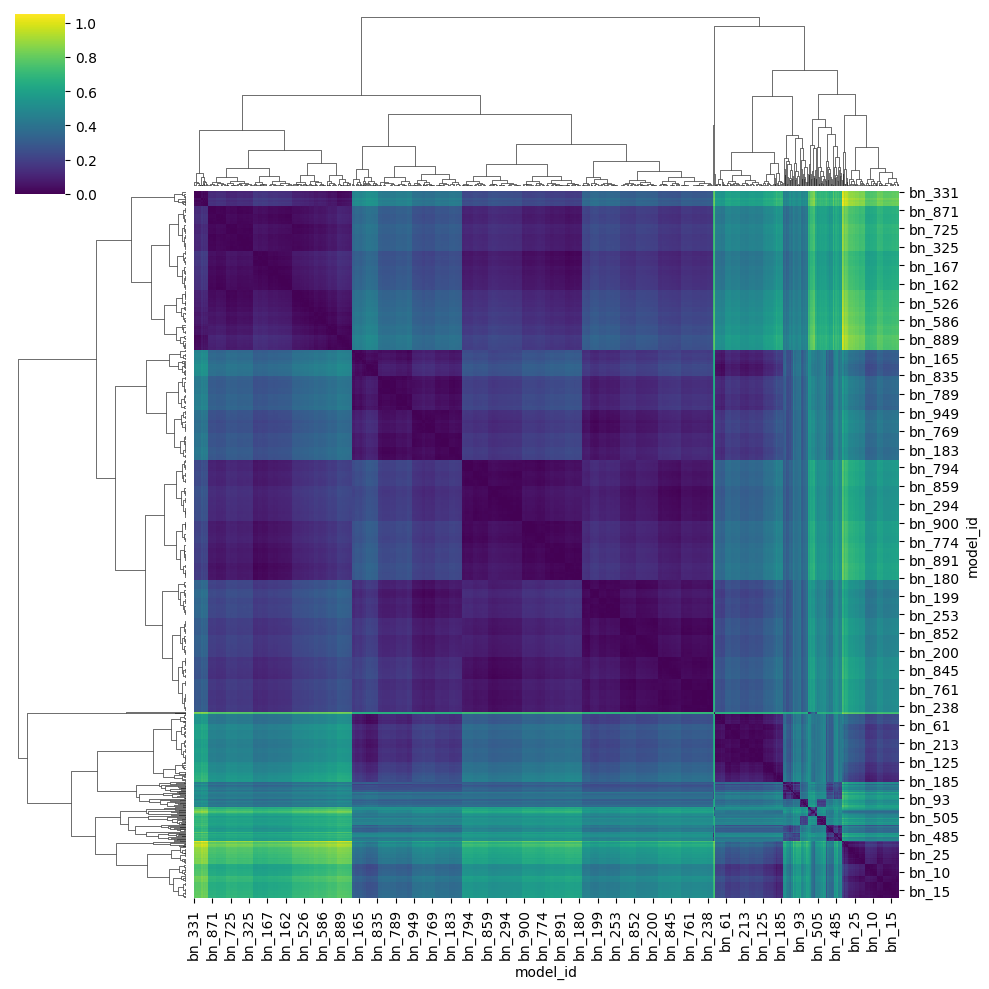

In [10]:
sns.clustermap(model.trajectory.distance_matrix, cmap='viridis', figsize=(10, 10))

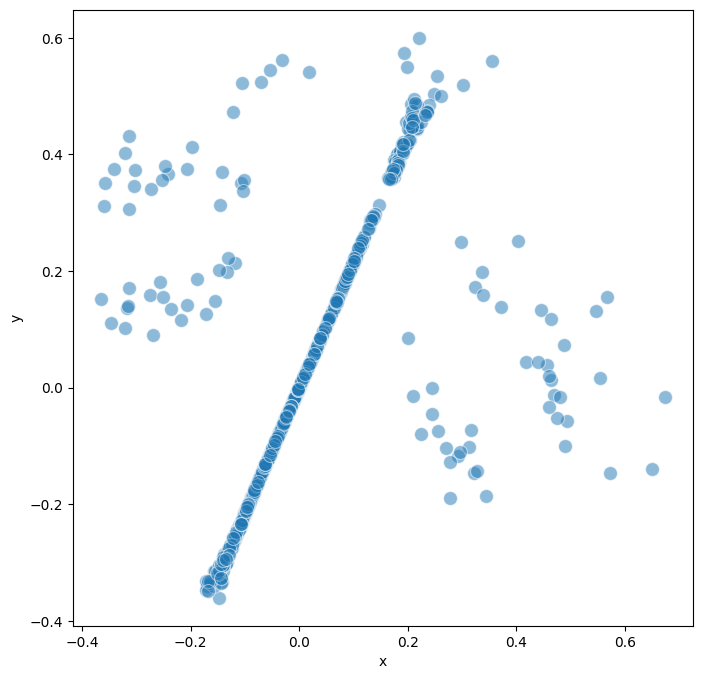

In [11]:
# Perform MDS (Multidimensional Scaling) for visualization
model.trajectory.calculate_MDS()
model.trajectory.plot_MDS(s = 100, fig_size = (8,8))

In [12]:
from sklearn.manifold import TSNE

# Calculate the UMAP coordinates
distance_matrix = model.trajectory.distance_matrix
tsne = TSNE(
    n_components=2,
    metric="precomputed",
    init = 'random',
    perplexity=30,      # must be < n/3
    learning_rate="auto",
    random_state=12345,
    n_iter=1000,
    verbose=1
)
coords = tsne.fit_transform(distance_matrix)

# Store the UMAP coordinates in a DataFrame
coords_vis = pd.DataFrame(coords, columns=['x', 'y'], index=distance_matrix.index)
model.trajectory.mds_coords = coords_vis

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.007193
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.450756
[t-SNE] KL divergence after 1000 iterations: 0.116897


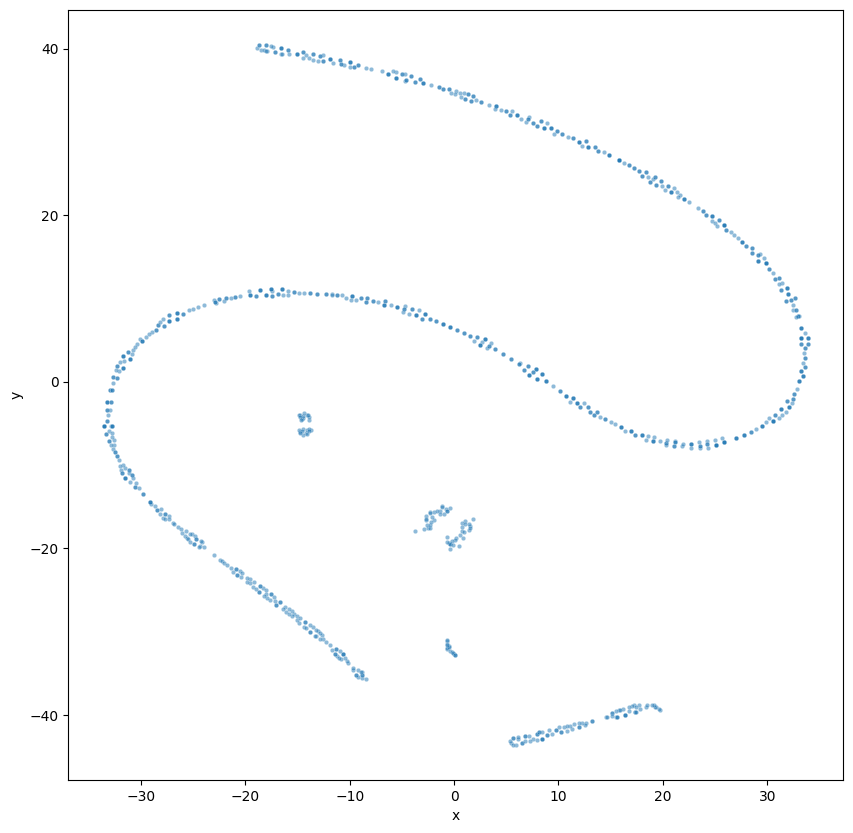

In [13]:
coords = model.trajectory.mds_coords
plt.figure(figsize=(10,10))
# Plot without cluster labels
sns.scatterplot(x=coords['x'], y=coords['y'],
                alpha=0.5, s=10)

plt.grid(False)
plt.show()

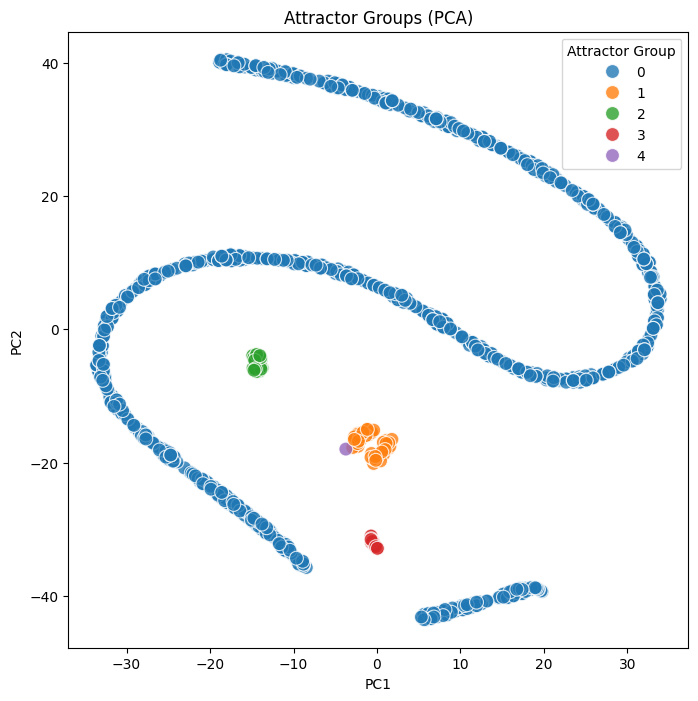

In [14]:
attractor_group_path = '/home/spankaew/Git/astrologics/data/attractor_group/attractor_group/' + model_name + '_attractor_group.csv'
attractor_group = pd.read_csv(attractor_group_path, index_col = 0)
attractor_group_dict = attractor_group['attractor_group'].to_dict()


coords = model.trajectory.mds_coords
coords['attractor_group'] = coords.index.map(attractor_group_dict)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=coords['x'],
    y=coords['y'],
    hue=coords['attractor_group'],
    palette='tab10',
    s=100,
    alpha=0.8
)
plt.legend(title="Attractor Group")
plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Attractor Groups (PCA)')
plt.show()

In [16]:
import umap
distance_matrix = model.trajectory.distance_matrix
# UMAP with precomputed distances
reducer = umap.UMAP(
    metric="precomputed",
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)
coords = reducer.fit_transform(distance_matrix)  # shape (n_samples, 2)

# Store the UMAP coordinates in a DataFrame
coords_vis = pd.DataFrame(coords, columns=['x', 'y'], index=distance_matrix.index)
model.trajectory.mds_coords = coords_vis

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


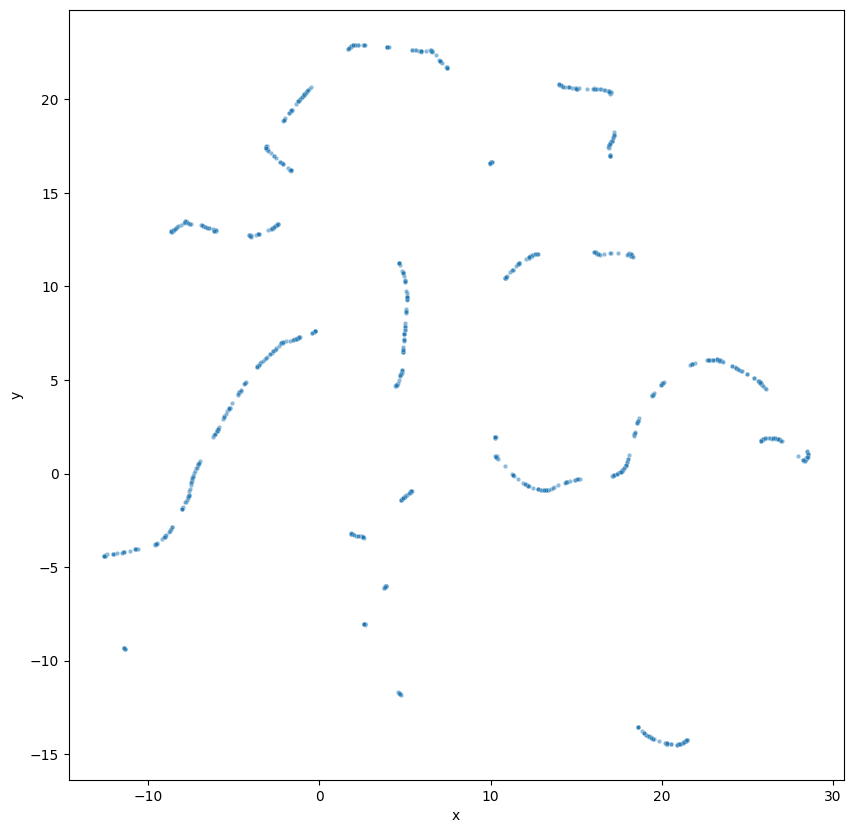

In [17]:
coords = coords_vis
plt.figure(figsize=(10,10))
# Plot without cluster labels
sns.scatterplot(x=coords['x'], y=coords['y'],
                alpha=0.5, s=10)

plt.grid(False)
plt.show()

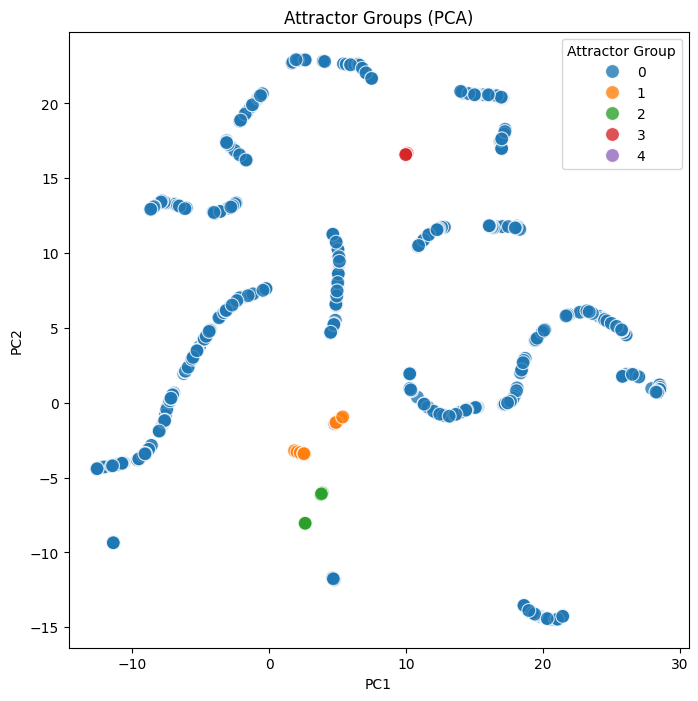

In [18]:
attractor_group_path = '/home/spankaew/Git/astrologics/data/attractor_group/attractor_group/' + model_name + '_attractor_group.csv'
attractor_group = pd.read_csv(attractor_group_path, index_col = 0)
attractor_group_dict = attractor_group['attractor_group'].to_dict()


coords = model.trajectory.mds_coords
coords['attractor_group'] = coords.index.map(attractor_group_dict)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=coords['x'],
    y=coords['y'],
    hue=coords['attractor_group'],
    palette='tab10',
    s=100,
    alpha=0.8
)
plt.legend(title="Attractor Group")
plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Attractor Groups (PCA)')
plt.show()

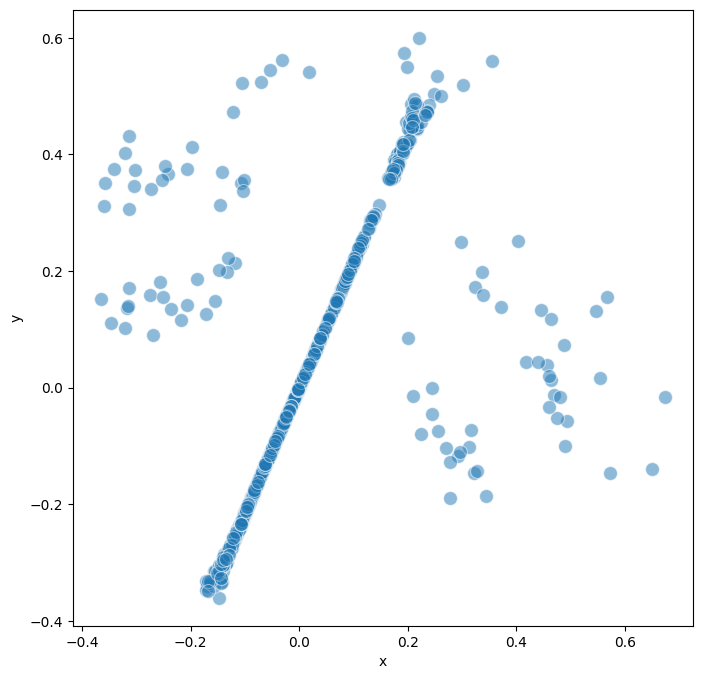

In [19]:
# Perform MDS (Multidimensional Scaling) for visualization
model.trajectory.calculate_MDS()
model.trajectory.plot_MDS(s = 100, fig_size = (8,8))

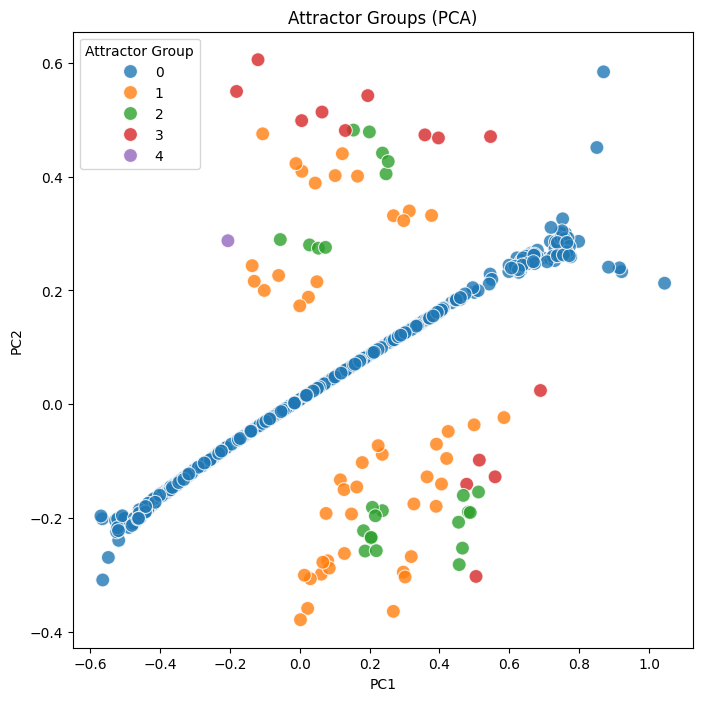

In [20]:
attractor_group_path = '/home/spankaew/Git/astrologics/data/attractor_group/attractor_group/' + model_name + '_attractor_group.csv'
attractor_group = pd.read_csv(attractor_group_path, index_col = 0)
attractor_group_dict = attractor_group['attractor_group'].to_dict()


coords = model.trajectory.mds_coords
coords['attractor_group'] = coords.index.map(attractor_group_dict)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=coords['x'],
    y=coords['y'],
    hue=coords['attractor_group'],
    palette='tab10',
    s=100,
    alpha=0.8
)
plt.legend(title="Attractor Group")
plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Attractor Groups (PCA)')
plt.show()

Calculated k-means clustering with 1 clusters.


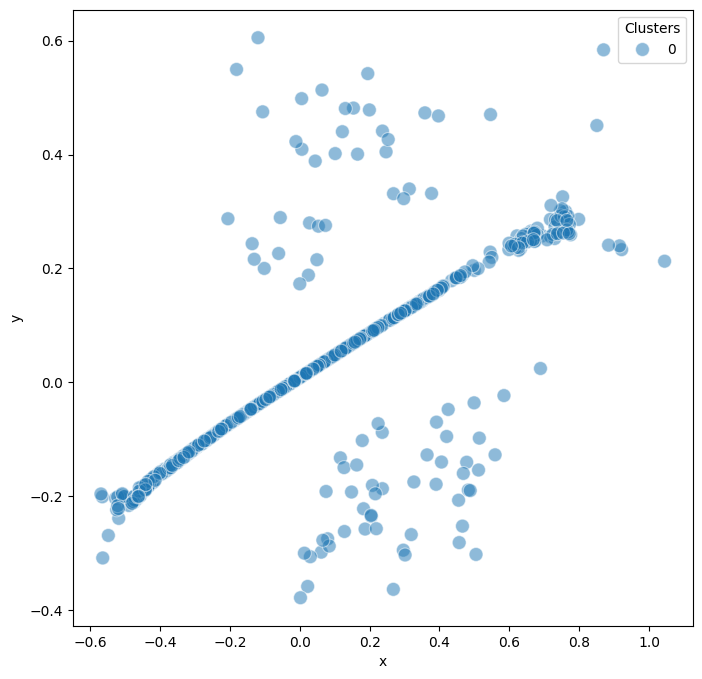

In [21]:
model.trajectory.calculate_kmean_cluster(n_cluster= 1, random_state = 12345)
model.trajectory.plot_MDS(plot_cluster=True, fig_size = (8,8), s =100)

In [23]:
attractor_data

,bn_411,bn_361,bn_60,bn_109,bn_975,bn_265,bn_784,bn_595,bn_34,bn_624,bn_520,bn_980,bn_529,bn_461,bn_300,bn_985,bn_818,bn_707,bn_421,bn_631,bn_399,bn_152,bn_708,bn_380,bn_108,bn_393,bn_129,bn_314,bn_918,bn_54,bn_179,bn_722,bn_554,bn_213,bn_192,bn_958,bn_676,bn_503,bn_119,bn_521,bn_460,bn_117,bn_934,bn_391,bn_823,bn_872,bn_717,bn_576,bn_811,bn_833,bn_571,bn_454,bn_839,bn_339,bn_161,bn_405,bn_301,bn_928,bn_228,bn_894,bn_432,bn_667,bn_85,bn_476,bn_410,bn_120,bn_773,bn_887,bn_856,bn_158,bn_546,bn_323,bn_962,bn_51,bn_840,bn_542,bn_885,bn_330,bn_849,bn_502,bn_900,bn_892,bn_555,bn_217,bn_316,bn_653,bn_589,bn_701,bn_560,bn_553,bn_508,bn_758,bn_353,bn_212,bn_67,bn_527,bn_914,bn_336,bn_271,bn_154,bn_388,bn_829,bn_105,bn_853,bn_635,bn_869,bn_696,bn_704,bn_39,bn_563,bn_446,bn_311,bn_801,bn_543,bn_436,bn_258,bn_313,bn_779,bn_939,bn_990,bn_174,bn_480,bn_101,bn_198,bn_967,bn_90,bn_898,bn_11,bn_94,bn_587,bn_378,bn_92,bn_545,bn_444,bn_407,bn_294,bn_156,bn_598,bn_96,bn_870,bn_494,bn_769,bn_699,bn_329,bn_195,bn_987,bn_95,bn_425,bn_976,bn_71,bn_718,bn_64,bn_475,bn_977,bn_620,bn_348,bn_804,bn_387,bn_884,bn_498,bn_889,bn_836,bn_523,bn_70,bn_398,bn_512,bn_242,bn_905,bn_677,bn_260,bn_482,bn_72,bn_864,bn_785,bn_593,bn_91,bn_695,bn_578,bn_499,bn_15,bn_20,bn_935,bn_767,bn_202,bn_286,bn_999,bn_815,bn_150,bn_513,bn_139,bn_138,bn_910,bn_204,bn_906,bn_255,bn_383,bn_44,bn_516,bn_989,bn_413,bn_897,bn_173,bn_703,bn_564,bn_896,bn_462,bn_240,bn_440,bn_789,bn_912,bn_113,bn_754,bn_702,bn_723,bn_42,bn_488,bn_18,bn_297,bn_243,bn_235,bn_187,bn_949,bn_690,bn_496,bn_493,bn_270,bn_291,bn_537,bn_403,bn_658,bn_798,bn_55,bn_145,bn_75,bn_619,bn_511,bn_778,bn_289,bn_350,bn_908,bn_249,bn_807,bn_533,bn_77,bn_368,bn_178,bn_254,bn_645,bn_199,bn_434,bn_825,bn_647,bn_298,bn_716,bn_686,bn_850,bn_609,bn_875,bn_917,bn_762,bn_592,bn_966,bn_929,bn_276,bn_168,bn_56,bn_491,bn_17,bn_16,bn_206,bn_886,bn_167,bn_649,bn_295,bn_916,bn_408,bn_651,bn_278,bn_472,bn_787,bn_401,bn_666,bn_49,bn_115,bn_964,bn_923,bn_259,bn_562,bn_599,bn_681,bn_988,bn_515,bn_924,bn_183,bn_290,bn_430,bn_660,bn_991,bn_79,bn_650,bn_737,bn_616,bn_362,bn_893,bn_14,bn_123,bn_873,bn_782,bn_837,bn_524,bn_371,bn_585,bn_981,bn_519,bn_909,bn_816,bn_827,bn_490,bn_87,bn_147,bn_891,bn_466,bn_305,bn_463,bn_797,bn_874,bn_858,bn_776,bn_953,bn_832,bn_851,bn_257,bn_899,bn_372,bn_293,bn_89,bn_404,bn_209,bn_994,bn_93,bn_559,bn_625,bn_812,bn_306,bn_605,bn_780,bn_28,bn_810,bn_248,bn_501,bn_684,bn_859,bn_793,bn_878,bn_48,bn_691,bn_374,bn_665,bn_541,bn_441,bn_384,bn_867,bn_662,bn_518,bn_761,bn_103,bn_288,bn_951,bn_82,bn_792,bn_652,bn_304,bn_841,bn_694,bn_427,bn_360,bn_210,bn_31,bn_185,bn_419,bn_400,bn_526,bn_720,bn_913,bn_149,bn_965,bn_269,bn_345,bn_30,bn_414,bn_478,bn_963,bn_715,bn_303,bn_321,bn_245,bn_640,bn_760,bn_697,bn_791,bn_479,bn_740,bn_727,bn_756,bn_504,bn_46,bn_52,bn_663,bn_509,bn_191,bn_234,bn_730,bn_151,bn_141,bn_486,bn_819,bn_207,bn_328,bn_633,bn_842,bn_216,bn_721,bn_594,bn_218,bn_477,bn_569,bn_99,bn_517,bn_443,bn_471,bn_860,bn_926,bn_993,bn_189,bn_904,bn_230,bn_137,bn_495,bn_881,bn_689,bn_626,bn_600,bn_634,bn_772,bn_451,bn_638,bn_551,bn_148,bn_643,bn_417,bn_264,bn_470,bn_363,bn_98,bn_539,bn_719,bn_485,bn_712,bn_586,bn_157,bn_750,bn_835,bn_739,bn_222,bn_809,bn_568,bn_45,bn_386,bn_945,bn_733,bn_215,bn_130,bn_481,bn_601,bn_845,bn_219,bn_678,bn_655,bn_379,bn_159,bn_6,bn_950,bn_982,bn_820,bn_783,bn_692,bn_753,bn_646,bn_416,bn_606,bn_409,bn_252,bn_29,bn_68,bn_817,bn_996,bn_693,bn_890,bn_176,bn_69,bn_337,bn_352,bn_741,bn_356,bn_326,bn_429,bn_713,bn_675,bn_448,bn_590,bn_62,bn_377,bn_847,bn_274,bn_312,bn_59,bn_960,bn_334,bn_135,bn_630,bn_711,bn_752,bn_296,bn_940,bn_997,bn_986,bn_262,bn_32,bn_373,bn_522,bn_959,bn_153,bn_735,bn_724,bn_535,bn_610,bn_796,bn_931,bn_43,bn_757,bn_331,bn_668,bn_106,bn_50,bn_636,bn_794,bn_611,bn_865,bn_116,bn_131,bn_38,bn_602,bn_285,bn_671,bn_505,bn_710,bn_364,bn_381,bn_682,bn_13,bn_570,bn_322,bn_428,bn_84,bn_110,bn_220,bn_211,bn_229,bn_469,bn_648,bn_497,bn_318,bn_396,bn_193,bn_354,bn_114,bn_238,bn_705,bn_458,bn_7

/tmp/ipykernel_50134/1580193243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endtimepoint_df.drop(columns=['timepoint'], inplace=True)


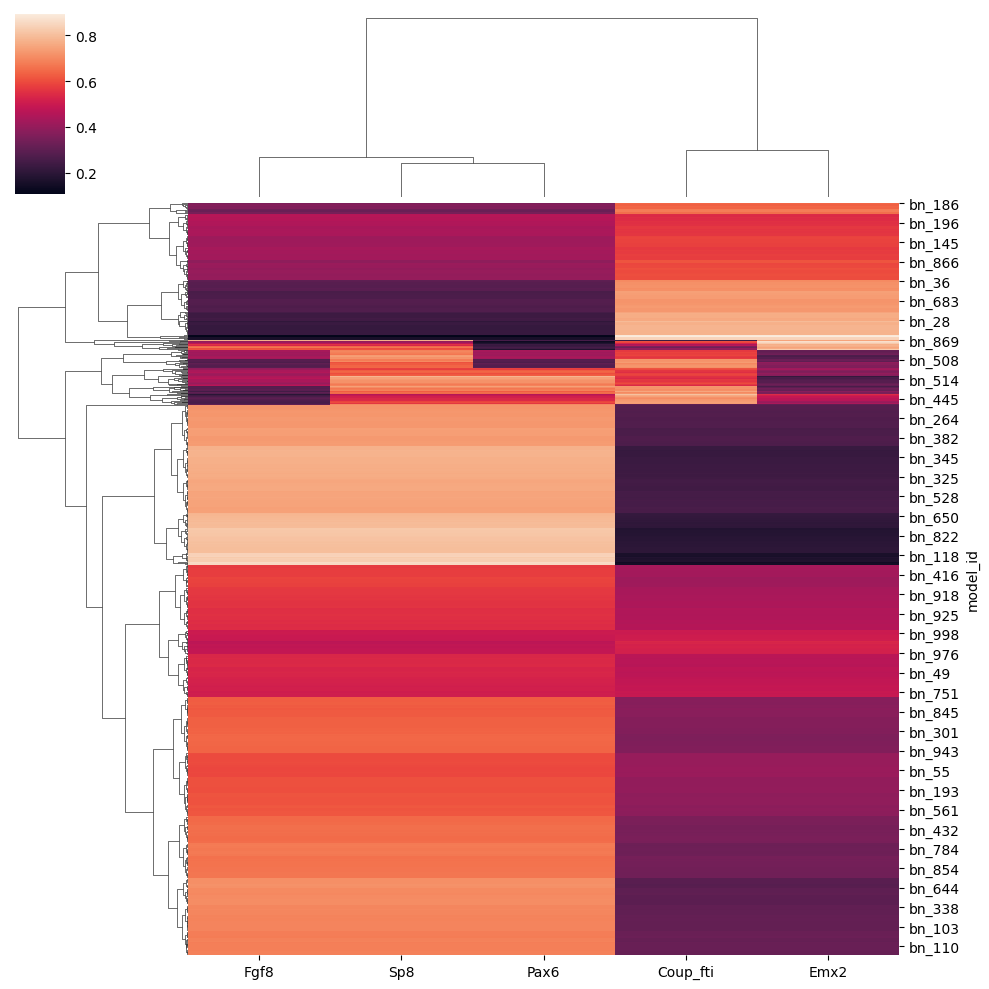

In [29]:
endtimepoint_df = model.simulation.simulation_df[model.simulation.simulation_df['timepoint'] == 29]
endtimepoint_df.set_index('model_id', inplace=True)
endtimepoint_df.drop(columns=['timepoint'], inplace=True)


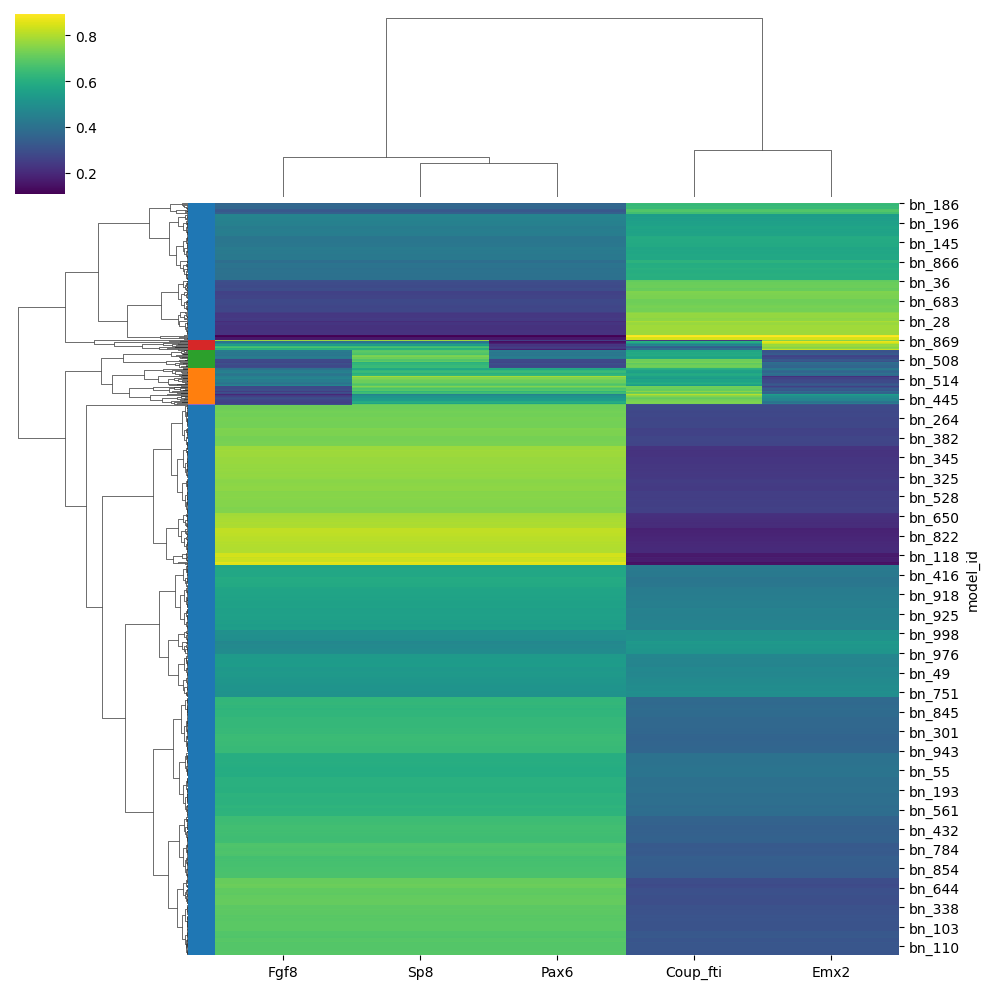

In [34]:
import matplotlib.colors as mcolors

# Map attractor group values to colors
unique_groups = attractor_group['attractor_group'].unique()
color_palette = sns.color_palette('tab10', len(unique_groups))
color_map = dict(zip(unique_groups, color_palette))
row_colors = endtimepoint_df.index.map(attractor_group_dict).map(color_map)

sns.clustermap(endtimepoint_df, cmap='viridis', figsize=(10, 10), row_colors=row_colors)

In [ ]:
model.create_attractor()
model.attractor.get_attractors()


Attractor object created


Processing models: 100%|██████████| 1000/1000 [00:13<00:00, 75.90it/s]
/home/spankaew/Git/astrologics/astrologics/model_attractors.py:81: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


Attractors calculation completed


,bn_411,bn_361,bn_60,bn_109,bn_975,bn_265,bn_784,bn_595,bn_34,bn_624,bn_520,bn_980,bn_529,bn_461,bn_300,bn_985,bn_818,bn_707,bn_421,bn_631,bn_399,bn_152,bn_708,bn_380,bn_108,bn_393,bn_129,bn_314,bn_918,bn_54,bn_179,bn_722,bn_554,bn_213,bn_192,bn_958,bn_676,bn_503,bn_119,bn_521,bn_460,bn_117,bn_934,bn_391,bn_823,bn_872,bn_717,bn_576,bn_811,bn_833,bn_571,bn_454,bn_839,bn_339,bn_161,bn_405,bn_301,bn_928,bn_228,bn_894,bn_432,bn_667,bn_85,bn_476,bn_410,bn_120,bn_773,bn_887,bn_856,bn_158,bn_546,bn_323,bn_962,bn_51,bn_840,bn_542,bn_885,bn_330,bn_849,bn_502,bn_900,bn_892,bn_555,bn_217,bn_316,bn_653,bn_589,bn_701,bn_560,bn_553,bn_508,bn_758,bn_353,bn_212,bn_67,bn_527,bn_914,bn_336,bn_271,bn_154,bn_388,bn_829,bn_105,bn_853,bn_635,bn_869,bn_696,bn_704,bn_39,bn_563,bn_446,bn_311,bn_801,bn_543,bn_436,bn_258,bn_313,bn_779,bn_939,bn_990,bn_174,bn_480,bn_101,bn_198,bn_967,bn_90,bn_898,bn_11,bn_94,bn_587,bn_378,bn_92,bn_545,bn_444,bn_407,bn_294,bn_156,bn_598,bn_96,bn_870,bn_494,bn_769,bn_699,bn_329,bn_195,bn_987,bn_95,bn_425,bn_976,bn_71,bn_718,bn_64,bn_475,bn_977,bn_620,bn_348,bn_804,bn_387,bn_884,bn_498,bn_889,bn_836,bn_523,bn_70,bn_398,bn_512,bn_242,bn_905,bn_677,bn_260,bn_482,bn_72,bn_864,bn_785,bn_593,bn_91,bn_695,bn_578,bn_499,bn_15,bn_20,bn_935,bn_767,bn_202,bn_286,bn_999,bn_815,bn_150,bn_513,bn_139,bn_138,bn_910,bn_204,bn_906,bn_255,bn_383,bn_44,bn_516,bn_989,bn_413,bn_897,bn_173,bn_703,bn_564,bn_896,bn_462,bn_240,bn_440,bn_789,bn_912,bn_113,bn_754,bn_702,bn_723,bn_42,bn_488,bn_18,bn_297,bn_243,bn_235,bn_187,bn_949,bn_690,bn_496,bn_493,bn_270,bn_291,bn_537,bn_403,bn_658,bn_798,bn_55,bn_145,bn_75,bn_619,bn_511,bn_778,bn_289,bn_350,bn_908,bn_249,bn_807,bn_533,bn_77,bn_368,bn_178,bn_254,bn_645,bn_199,bn_434,bn_825,bn_647,bn_298,bn_716,bn_686,bn_850,bn_609,bn_875,bn_917,bn_762,bn_592,bn_966,bn_929,bn_276,bn_168,bn_56,bn_491,bn_17,bn_16,bn_206,bn_886,bn_167,bn_649,bn_295,bn_916,bn_408,bn_651,bn_278,bn_472,bn_787,bn_401,bn_666,bn_49,bn_115,bn_964,bn_923,bn_259,bn_562,bn_599,bn_681,bn_988,bn_515,bn_924,bn_183,bn_290,bn_430,bn_660,bn_991,bn_79,bn_650,bn_737,bn_616,bn_362,bn_893,bn_14,bn_123,bn_873,bn_782,bn_837,bn_524,bn_371,bn_585,bn_981,bn_519,bn_909,bn_816,bn_827,bn_490,bn_87,bn_147,bn_891,bn_466,bn_305,bn_463,bn_797,bn_874,bn_858,bn_776,bn_953,bn_832,bn_851,bn_257,bn_899,bn_372,bn_293,bn_89,bn_404,bn_209,bn_994,bn_93,bn_559,bn_625,bn_812,bn_306,bn_605,bn_780,bn_28,bn_810,bn_248,bn_501,bn_684,bn_859,bn_793,bn_878,bn_48,bn_691,bn_374,bn_665,bn_541,bn_441,bn_384,bn_867,bn_662,bn_518,bn_761,bn_103,bn_288,bn_951,bn_82,bn_792,bn_652,bn_304,bn_841,bn_694,bn_427,bn_360,bn_210,bn_31,bn_185,bn_419,bn_400,bn_526,bn_720,bn_913,bn_149,bn_965,bn_269,bn_345,bn_30,bn_414,bn_478,bn_963,bn_715,bn_303,bn_321,bn_245,bn_640,bn_760,bn_697,bn_791,bn_479,bn_740,bn_727,bn_756,bn_504,bn_46,bn_52,bn_663,bn_509,bn_191,bn_234,bn_730,bn_151,bn_141,bn_486,bn_819,bn_207,bn_328,bn_633,bn_842,bn_216,bn_721,bn_594,bn_218,bn_477,bn_569,bn_99,bn_517,bn_443,bn_471,bn_860,bn_926,bn_993,bn_189,bn_904,bn_230,bn_137,bn_495,bn_881,bn_689,bn_626,bn_600,bn_634,bn_772,bn_451,bn_638,bn_551,bn_148,bn_643,bn_417,bn_264,bn_470,bn_363,bn_98,bn_539,bn_719,bn_485,bn_712,bn_586,bn_157,bn_750,bn_835,bn_739,bn_222,bn_809,bn_568,bn_45,bn_386,bn_945,bn_733,bn_215,bn_130,bn_481,bn_601,bn_845,bn_219,bn_678,bn_655,bn_379,bn_159,bn_6,bn_950,bn_982,bn_820,bn_783,bn_692,bn_753,bn_646,bn_416,bn_606,bn_409,bn_252,bn_29,bn_68,bn_817,bn_996,bn_693,bn_890,bn_176,bn_69,bn_337,bn_352,bn_741,bn_356,bn_326,bn_429,bn_713,bn_675,bn_448,bn_590,bn_62,bn_377,bn_847,bn_274,bn_312,bn_59,bn_960,bn_334,bn_135,bn_630,bn_711,bn_752,bn_296,bn_940,bn_997,bn_986,bn_262,bn_32,bn_373,bn_522,bn_959,bn_153,bn_735,bn_724,bn_535,bn_610,bn_796,bn_931,bn_43,bn_757,bn_331,bn_668,bn_106,bn_50,bn_636,bn_794,bn_611,bn_865,bn_116,bn_131,bn_38,bn_602,bn_285,bn_671,bn_505,bn_710,bn_364,bn_381,bn_682,bn_13,bn_570,bn_322,bn_428,bn_84,bn_110,bn_220,bn_211,bn_229,bn_469,bn_648,bn_497,bn_318,bn_396,bn_193,bn_354,bn_114,bn_238,bn_705,bn_458,bn_7

In [39]:
attractor_df = model.attractor.attractors_df

# Map attractor group values to colors
unique_groups = attractor_group['attractor_group'].unique()
color_palette = sns.color_palette('tab10', len(unique_groups))
color_map = dict(zip(unique_groups, color_palette))
row_colors = attractor_df.columns.map(attractor_group_dict).map(color_map)

OrderedDict([('time_tick', 1),
             ('max_time', 100),
             ('sample_count', 1000),
             ('discrete_time', 0),
             ('use_physrandgen', 1),
             ('seed_pseudorandom', 0),
             ('display_traj', 0),
             ('statdist_traj_count', 0),
             ('statdist_cluster_threshold', 1),
             ('thread_count', 1),
             ('statdist_similarity_cache_max_size', 20000)])

In [66]:
import maboss
from tqdm import tqdm
def run_states_simulation(model, output_nodes = None, initial_state = None, mutation = None):
    
    # Simulation results object
    ensemble_results = {}
    path = model.simulation.path
    model_list = os.listdir(path)
    print('Start simulation')
    
    # For loop to run the simulation
    for model in tqdm(model_list):
        # Load model
        simulations = maboss.loadBNet(path + model)
        simulations.param['thread_count'] = 15  
        
        # Setup the model initial condition
        #simulations.param = model.simulation.param

        # Set the initial condition
        if initial_state is not None:
            node_names = simulations.network.names
            assigned_node = list(initial_state.keys())
            unassigned_node = list(set(node_names) - set(assigned_node))

            # Set the initial condition - assigned node
            for i in assigned_node:
                simulations.network.set_istate(i, [1 - initial_state[i], initial_state[i]])

            # Set the initial condition - unassigned node
            for i in unassigned_node:
                simulations.network.set_istate(i, [0.5, 0.5])
        
        # Set the mutation condition
        if mutation is not None:
            condition = model.simulation.mutations[mutation]
            # Set the condition
            simulations.mutate(condition[0],condition[1])

        # Set the output of the simulation
        if output_nodes is not None:
            simulations.network.set_output(output_nodes)
        else:
            simulations.network.set_output(simulations.network.names)

        # Perform simulations
        result = simulations.run()
        # Get matrix
        model_mtx = result.get_last_states_probtraj().copy()

        # Setup cell matrix
        ## Cells
        model_mtx['model_id'] = model.replace('.bnet','')
        ## Timepoint
        model_mtx['timepoint'] = model_mtx.index
        ## Change index
        model_mtx.index = model_mtx.index.map(str)
        model_mtx.index = model + '_' + model_mtx.index

        # Concatenate model results in dictionary
        ensemble_results[model] = model_mtx

    # Save the simulation to /tmp folder
    states_df = pd.concat(ensemble_results.values(), ignore_index = True)
    
    # Save the simulation to the object
    return(states_df)

In [67]:
test = pd.read_csv(model.path + '/bn_0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))
states_df = run_states_simulation(model, initial_state = test_dict, output_nodes = None, mutation = None)

Start simulation


100%|██████████| 1000/1000 [04:33<00:00,  3.66it/s]


In [ ]:
states_df.drop('timepoint', axis=1, inplace=True)
states_df.set_index('model_id', inplace=True)

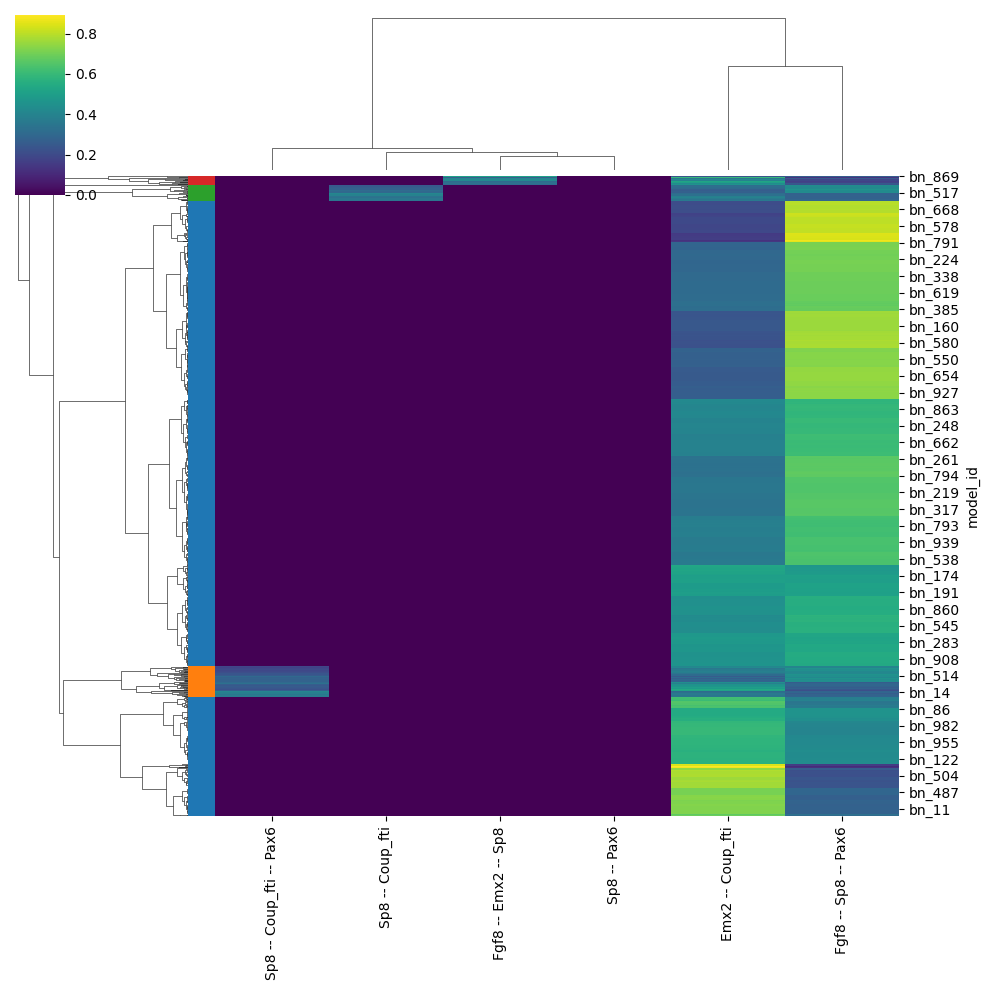

In [76]:
import matplotlib.colors as mcolors

# Map attractor group values to colors
unique_groups = attractor_group['attractor_group'].unique()
color_palette = sns.color_palette('tab10', len(unique_groups))
color_map = dict(zip(unique_groups, color_palette))
row_colors = states_df.index.map(attractor_group_dict).map(color_map)

sns.clustermap(states_df.fillna(0), cmap='viridis', figsize=(10, 10), row_colors=row_colors)